In [21]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import deque

In [22]:
# Load grayscale image
img_path = os.path.join("..", "images", "task_02", "image_02.png")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
height, width = img.shape 
print(f"Image dimensions: Width = {width} px, Height = {height} px")

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

Image dimensions: Width = 1200 px, Height = 1087 px


In [23]:
# Region growing implementation
def region_growing(image, seed, threshold=20):
    h, w = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)

    seed_val = int(image[seed])
    queue = deque([seed])
    visited[seed] = 1
    region[seed] = 255

    while queue:
        y, x = queue.popleft()
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                ny, nx = y + dy, x + dx
                if 0 <= ny < h and 0 <= nx < w and not visited[ny, nx]:
                    pixel_val = int(image[ny, nx])
                    if abs(pixel_val - seed_val) <= threshold:
                        queue.append((ny, nx))
                        visited[ny, nx] = 1
                        region[ny, nx] = 255

    return region

In [24]:
# Choose a seed point inside object (manually or via inspection)
seed_point = (500, 500) 

# Run region growing
segmented = region_growing(img, seed=seed_point, threshold=25)

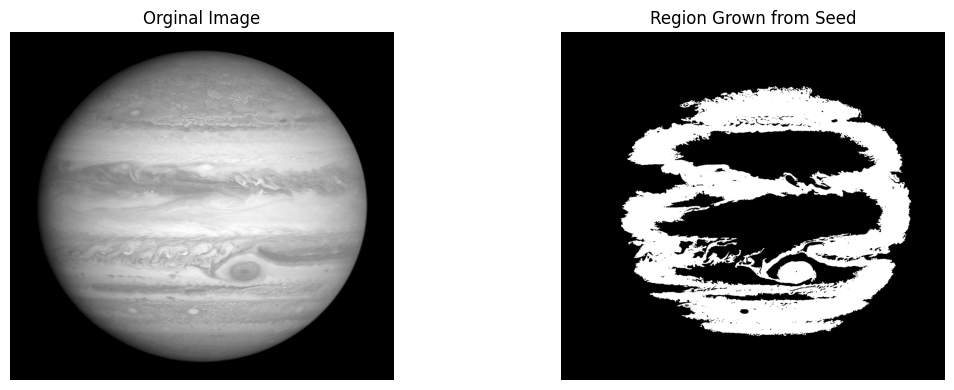

In [25]:
# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Orginal Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Grown from Seed")
plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
result_dir = os.path.join("..", "outputs", "task_02")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "region_growing.jpg"), segmented)

True